<a href="https://colab.research.google.com/github/roscibely/Artificial-Intelligence-Course/blob/main/Diabetes_dataset_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**2. Diabetes**

In [91]:
#Prevent unnecessary warnings.
import warnings
warnings.filterwarnings("ignore")

#Introduce the basic package of data science.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

#Import the dataset used this time.
from sklearn.datasets import load_diabetes

In [92]:
#Introduce machine learning, preprocessing, model selection, and evaluation indicators.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
#Introduce algorithms.
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNet
#Compared with SVC, it is the regression form of SVM.
from sklearn.svm import SVR
#Integrate algorithms.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

##**2.1 Dataset**

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [96]:
#Load the Boston house price data set.
diabetes = load_diabetes()

#x features, and y labels.
x = diabetes.data
y = diabetes.target

In [97]:
#Convert to the dataframe format.
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


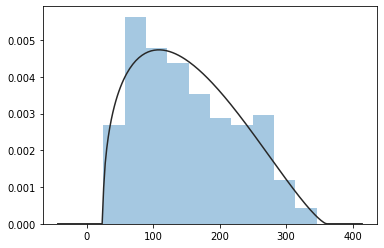

In [98]:
#Visualize label distribution.
sns.distplot(tuple(y), kde=False, fit=st.beta)
plt.show()

In [102]:
#Segment the data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

#Standardize the data set.
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

#x_train[0:100]

In [103]:
#Set the model name.
names = ['LinerRegression',
       'Ridge',
       'Lasso',
       'Random Forrest',
       'GBDT',
       'Support Vector Regression',
       'ElasticNet',
       'XgBoost']

#Define the model.
# cv is the cross-validation idea here.
models = [LinearRegression(),
         RidgeCV(alphas=(0.001,0.1,1),cv=3),
         LassoCV(alphas=(0.001,0.1,1),cv=5),
         RandomForestRegressor(n_estimators=10),
         GradientBoostingRegressor(n_estimators=30),
         SVR(),
         ElasticNet(alpha=0.001,max_iter=10000),
         XGBRegressor()]
# Output the R2 scores of all regression models.

#Define the R2 scoring function.
def R2(model,x_train, x_test, y_train, y_test):

        model_fitted = model.fit(x_train,y_train)
        y_pred = model_fitted.predict(x_test)
        score = r2_score(y_test, y_pred)
        return score

#Traverse all models to score.
for name,model in zip(names,models):
        score = R2(model,x_train, x_test, y_train, y_test)
        print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LinerRegression: 0.417982, 0.0000
Ridge: 0.422222, 0.0000
Lasso: 0.422921, 0.0000
Random Forrest: 0.370395, 0.0000
GBDT: 0.382505, 0.0000
Support Vector Regression: 0.192553, 0.0000
ElasticNet: 0.419012, 0.0000
[00:39:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XgBoost: 0.366354, 0.0000


In [104]:
#Build a model.
'''
  'kernel': kernel function
  'C': SVR regularization factor
  'gamma': 'rbf', 'poly' and 'sigmoid' kernel function coefficient, which affects the model performance
'''
parameters = {
   'kernel': ['poly', 'linear'],
   'C': [0.1, 0.5,0.9,1,5],
   'gamma': [0.001,0.01,0.1,1]
}

#Use grid search and perform cross validation.
model = GridSearchCV(SVR(), param_grid=parameters, cv=3)
model.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 0.9, 1, 5],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [105]:
##Obtain optimal parameters.
print("Optimal parameter list:", model.best_params_)
print("Optimal model:", model.best_estimator_)
print("Optimal R2 value:", model.best_score_)

Optimal parameter list: {'C': 0.9, 'gamma': 0.001, 'kernel': 'linear'}
Optimal model: SVR(C=0.9, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Optimal R2 value: 0.4961921559948154


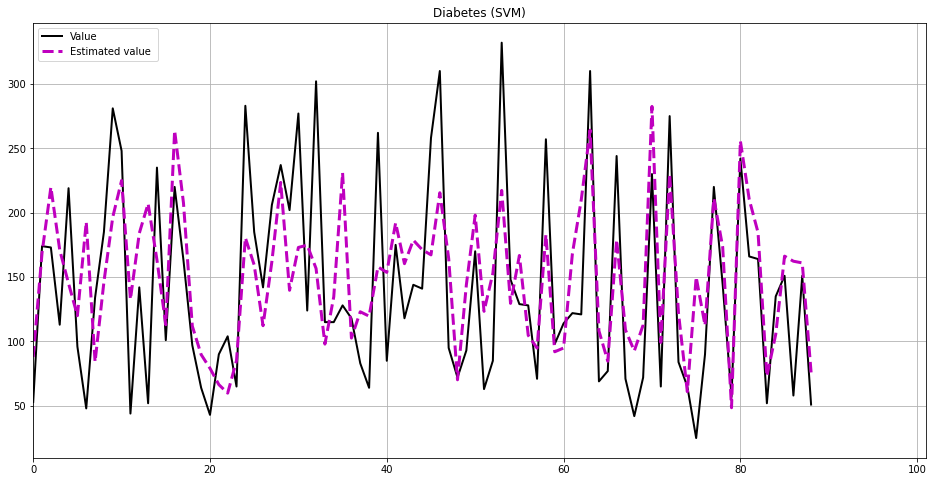

In [106]:
##Perform visualization.
ln_x_test = range(len(x_test))
y_predict = model.predict(x_test)

#Set the canvas.
plt.figure(figsize=(16,8), facecolor='w')
#Draw with a red solid line.
plt.plot (ln_x_test, y_test, 'k-', lw=2, label=u'Value')
#Draw with a green solid line.
plt.plot (ln_x_test, y_predict, 'm--', lw = 3, label=u'Estimated value ')

#Display in a diagram.
plt.legend(loc ='upper left')
plt.grid(True)
plt.title(u"Diabetes (SVM)")
plt.xlim(0, 101)
plt.show()

In [107]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

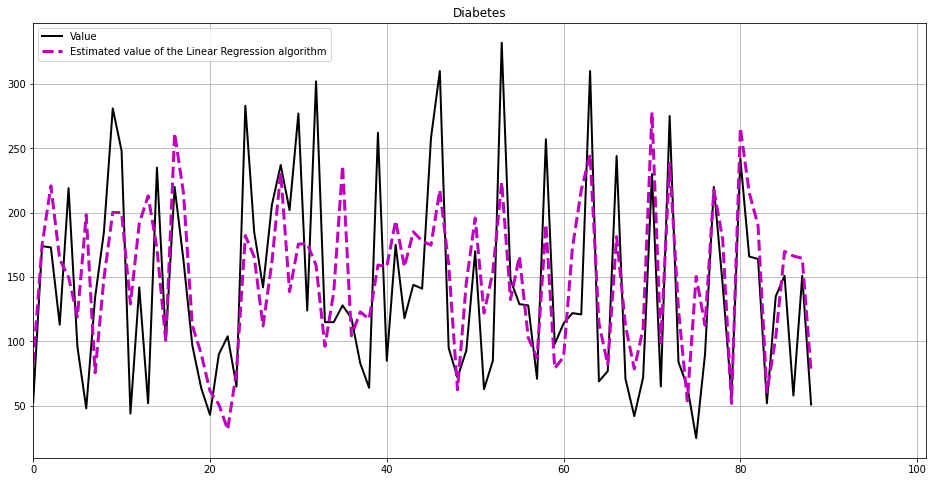

In [108]:
##Perform visualization.
ln_x_test = range(len(x_test))
y_predict = model.predict(x_test)

#Set the canvas.
plt.figure(figsize=(16,8), facecolor='w')
#Draw with a red solid line.
plt.plot (ln_x_test, y_test, 'k-', lw=2, label=u'Value')
#Draw with a green solid line.
plt.plot (ln_x_test, y_predict, 'm--', lw = 3, label=u'Estimated value of the Linear Regression algorithm')

#Display in a diagram.
plt.legend(loc ='upper left')
plt.grid(True)
plt.title(u"Diabetes")
plt.xlim(0, 101)
plt.show()